In [32]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [8]:
dataset = pd.read_csv('heart.csv')

In [5]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Exploratory Data Analysis

checking if it is balanced or imbalanced dataset by count plot

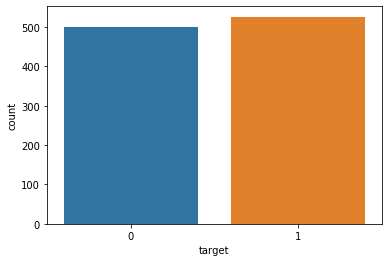

In [9]:
sns.countplot(dataset['target'])

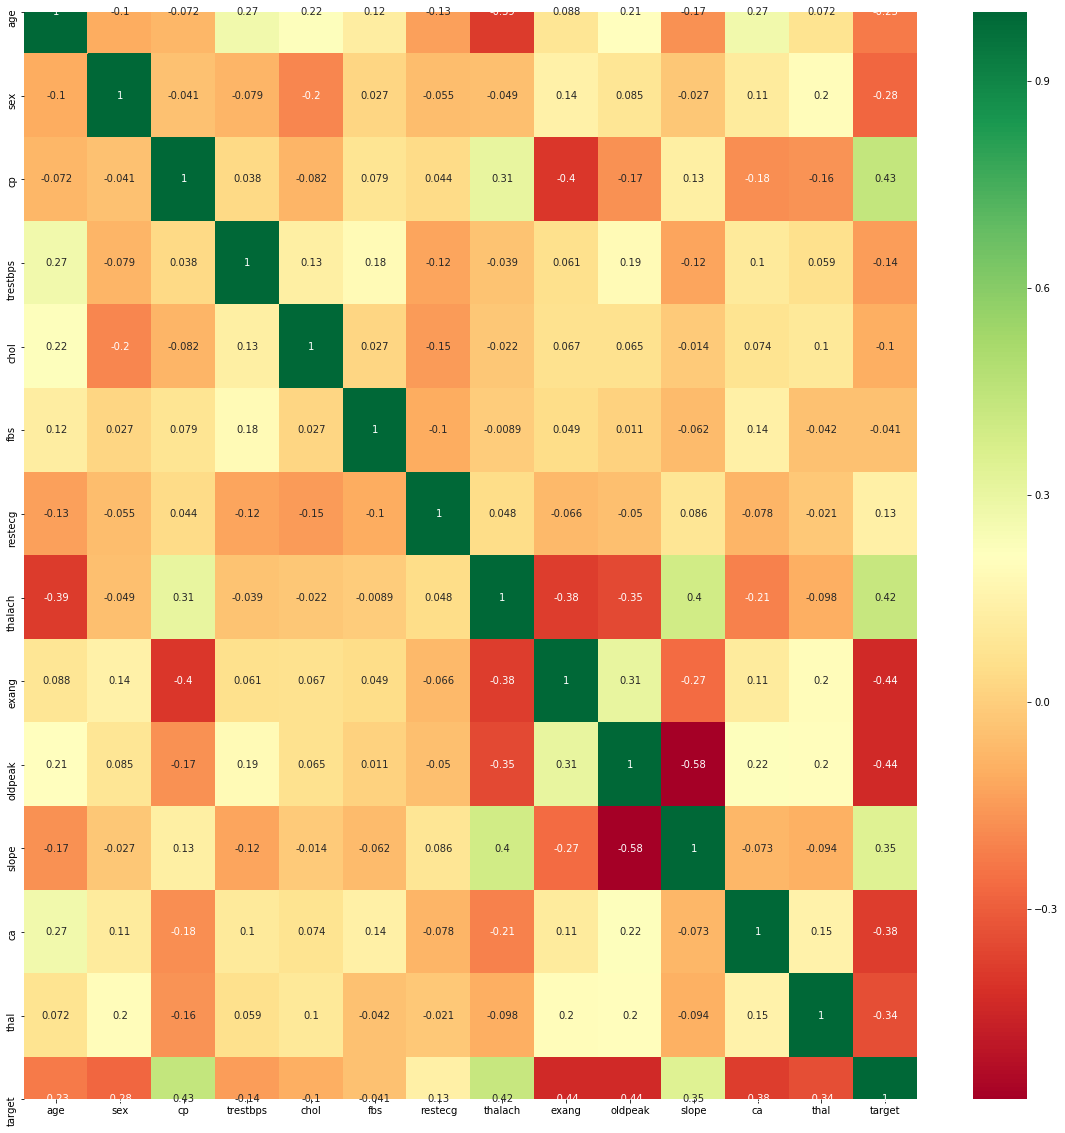

In [24]:
correlated = dataset.corr()
top_feature = correlated.index
plt.figure(figsize=[20,20])
sns.heatmap(dataset[top_feature].corr(), annot=True, cmap = 'RdYlGn')

In [10]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Feature Engineering- features to scale

In [12]:
featuresToScale = ['age','trestbps','chol','thalach', 'oldpeak']

In [14]:
sc = StandardScaler(dataset)

In [15]:
dataset[featuresToScale] = sc.fit_transform(dataset[featuresToScale])

# Model Building

In [16]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,0,1,0.647366,1,-0.912329,2,0,2
1021,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,1,1,3
1022,-0.819834,1,0,-1.234378,0.562371,0,0,-1.353113,1,-0.060888,1,1,2
1023,-0.488996,0,0,-1.234378,0.155137,0,0,0.429923,0,-0.912329,2,0,2


In [17]:
accuracy = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    accuracy.append(cross_val_score(knn,X,y, cv=10).mean())

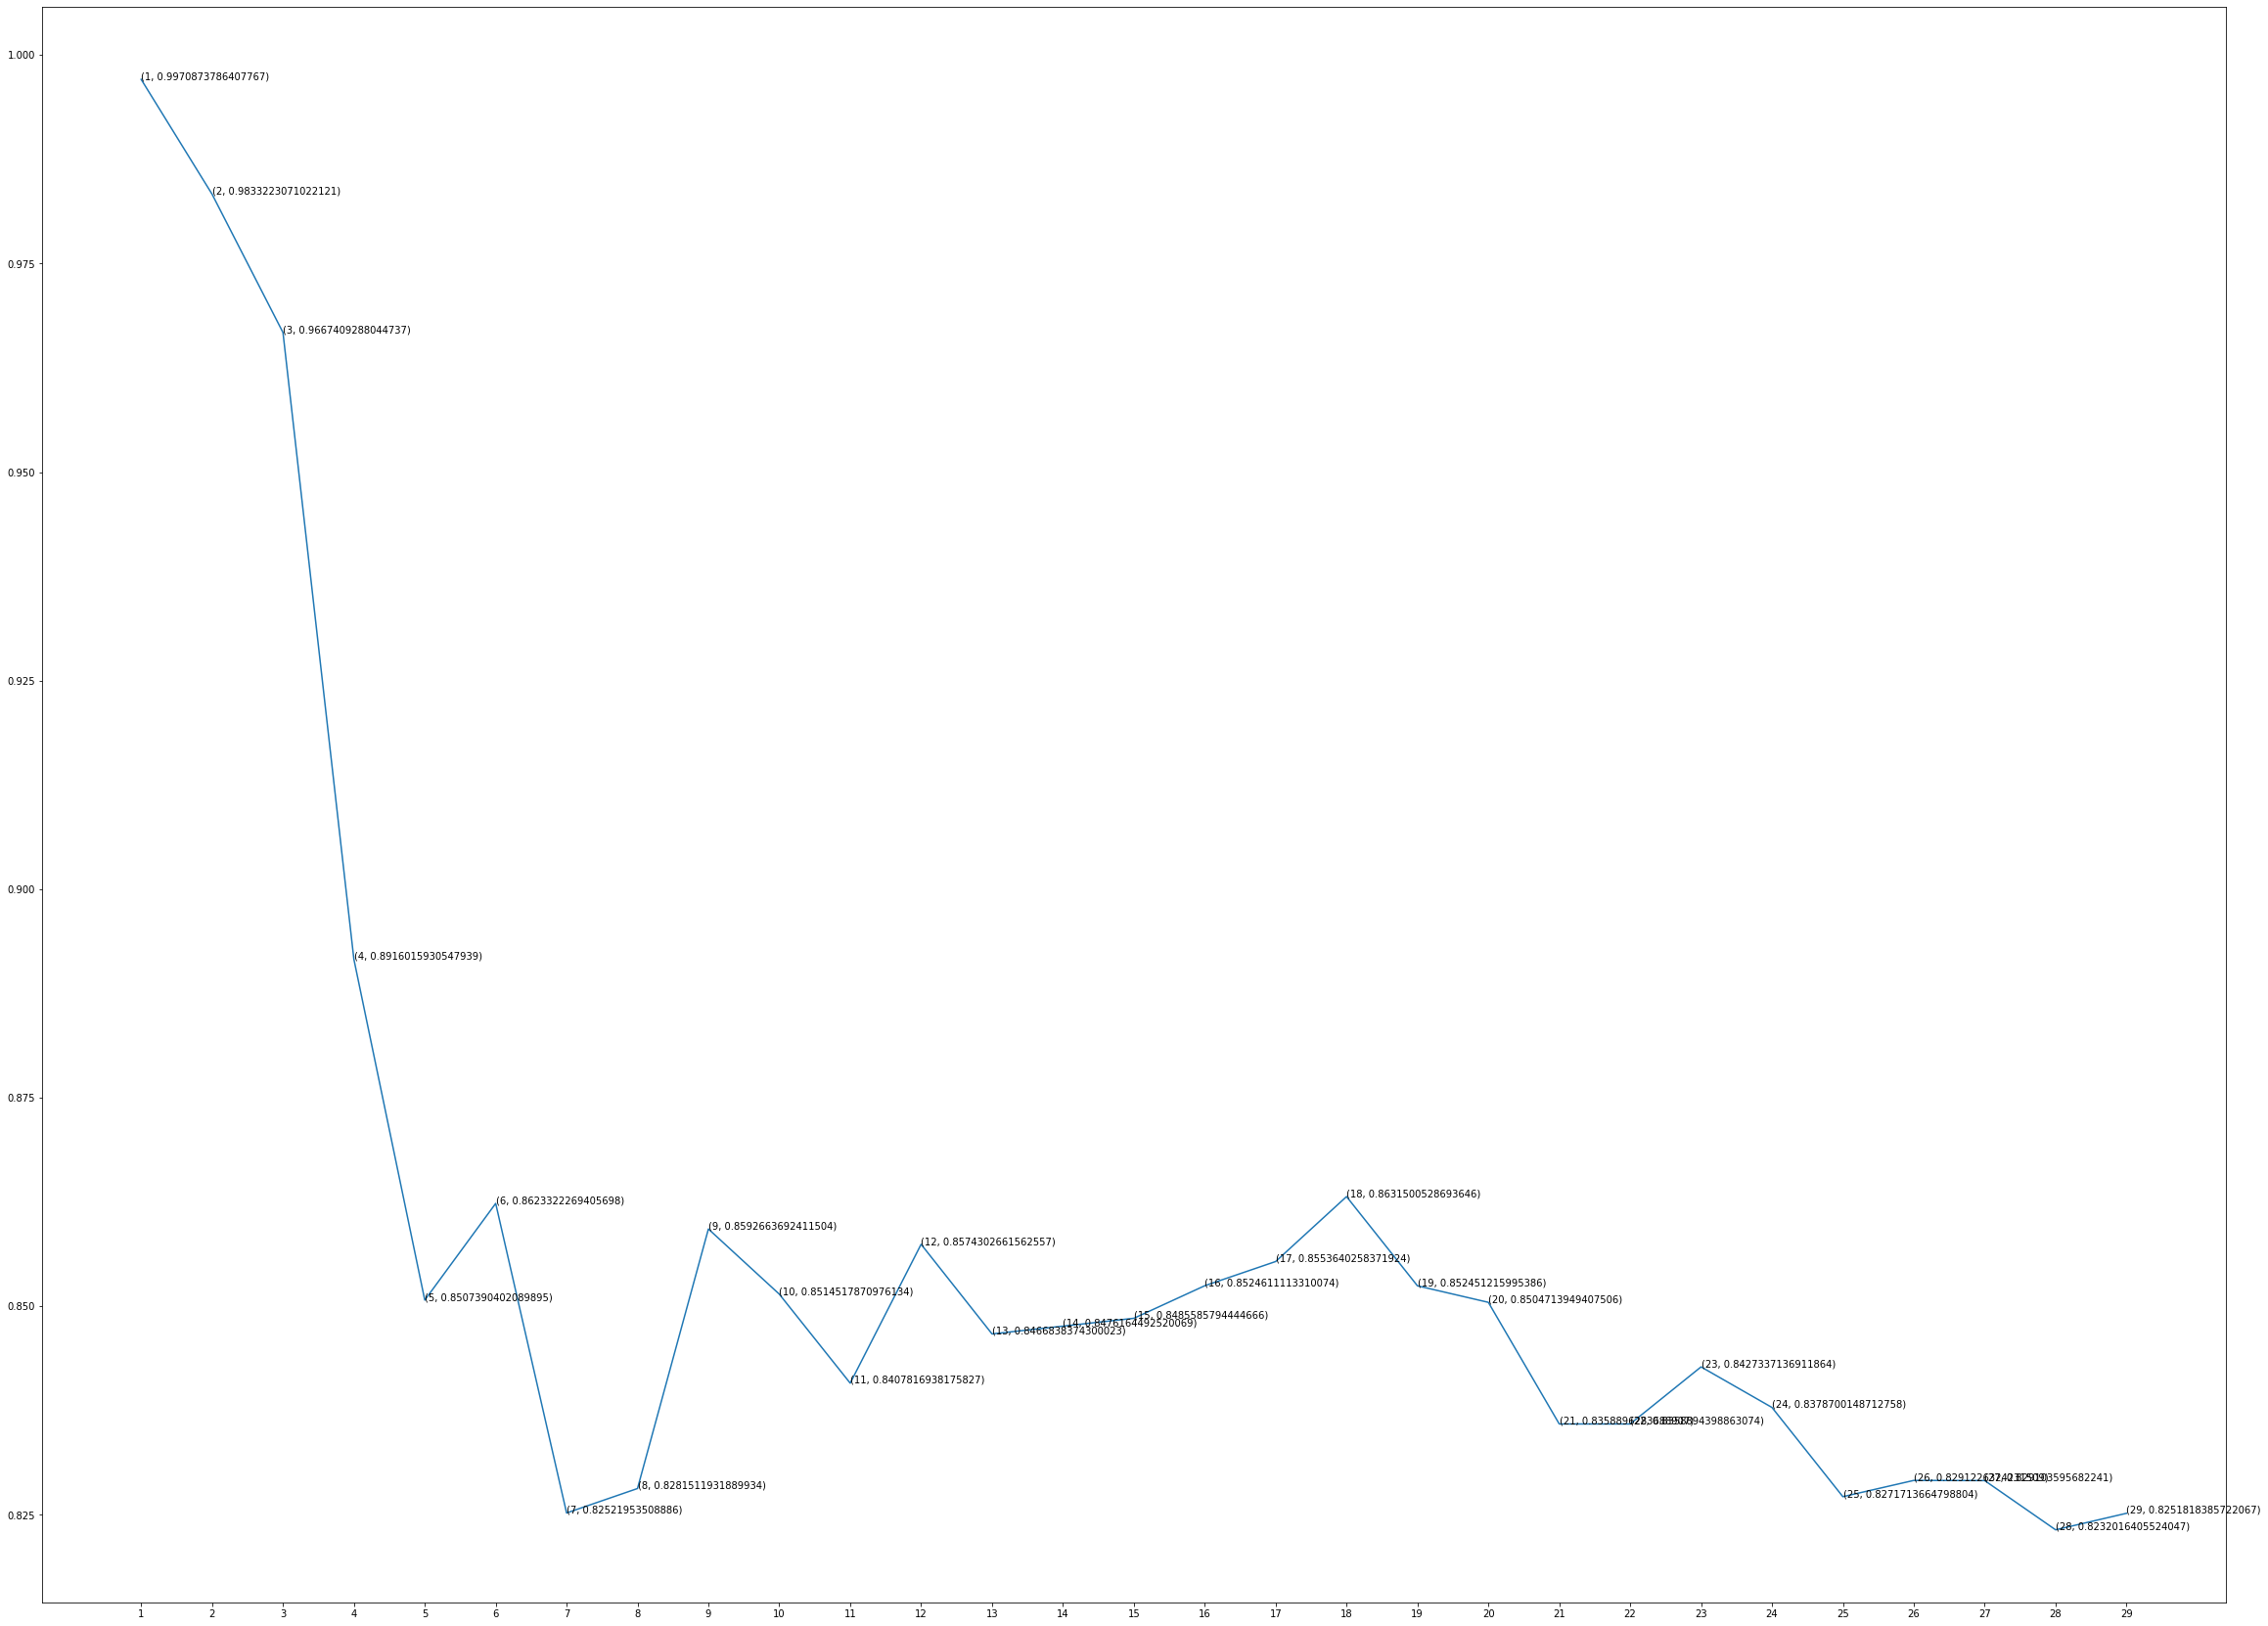

In [26]:
plt.figure(figsize=[40,30])
plt.plot(range(1,30), accuracy)
plt.xticks([i for i in range(1, 30)])
for i in range(1, 30):
    plt.text(i, accuracy[i-1], (i, accuracy[i-1]))

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
knn = KNeighborsClassifier(n_neighbors=1)
knn1 = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f1_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

knn1.fit(X_train, y_train)
y_pred1 = knn1.predict(X_test)
print(f1_score(y_test,y_pred1))
print(confusion_matrix(y_test, y_pred1))

1.0
[[ 98   0]
 [  0 107]]
0.9
[[84 14]
 [ 8 99]]


In [41]:
param = dict(n_estimators = [estimator for estimator in range(1,30)])
model = RandomForestClassifier()
gridModel = GridSearchCV(estimator=model, param_grid=param, cv = 10)
gridModel.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [42]:
gridModel.best_score_

0.9939024390243902

In [43]:
gridModel.best_params_

{'n_estimators': 12}

In [45]:
randomForest = RandomForestClassifier(n_estimators=27)
randomForest.fit(X_train, y_train)
y_pred = randomForest.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
[[ 98   0]
 [  0 107]]


In [46]:
decisionTree = DecisionTreeClassifier()

In [47]:
print(cross_val_score(decisionTree, X, y, cv =10 ).mean())

1.0
